In [37]:
#1.1 Data Extraction and Transformation with Python and PySpark

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark = SparkSession.builder.appName('capstone').getOrCreate()

#data = ["capstone\cdw_sapp_branch.json", "capstone\cdw_sapp_credit.json", "capstone\cdw_sapp_customer.json"]

# data = ["C:\\Users\\SGKsk\\Development - Per Scholas\\2024-RTT-107-Sharon\\capstone\\cdw_sapp_branch.json", 
#         "C:\\Users\\SGKsk\\Development - Per Scholas\\2024-RTT-107-Sharon\\capstone\\cdw_sapp_credit.json",
#         "C:\\Users\\SGKsk\\Development - Per Scholas\\2024-RTT-107-Sharon\\capstone\\cdw_sapp_customer.json"]

#data = ["C:\\Users\\SGKsk\\Development - Per Scholas\\2024-RTT-107-Sharon\\capstone\\cdw_sapp_credit.json"]

#spark_df = spark.read.load("capstone\\*.json", format="csv", header = True, inferSchema = True)
#spark_df = spark.read.load("capstone/*.json", format="csv", header = True, inferSchema = True)
spark_df = spark.read.option("multiline", "true").json("C:\\Users\\SGKsk\\Development - Per Scholas\\2024-RTT-107-Sharon\\capstone\\cdw_sapp_credit.json")
#spark_df = spark.read.load("C:\\Users\\SGKsk\\Development - Per Scholas\\2024-RTT-107-Sharon\\capstone\\cdw_sapp_credit.json", format="json", header = True, inferSchema = True)

ParseException: 
[PARSE_SYNTAX_ERROR] Syntax error at or near ':'.(line 1, pos 1)

== SQL ==
C:\Users\SGKsk\Development - Per Scholas\2024-RTT-107-Sharon\capstone\cdw_sapp_credit.json
-^^^


In [36]:
spark_df.printSchema()
spark_df.show()

root
 |-- BRANCH_CODE: long (nullable = true)
 |-- CREDIT_CARD_NO: string (nullable = true)
 |-- CUST_SSN: long (nullable = true)
 |-- DAY: long (nullable = true)
 |-- MONTH: long (nullable = true)
 |-- TRANSACTION_ID: long (nullable = true)
 |-- TRANSACTION_TYPE: string (nullable = true)
 |-- TRANSACTION_VALUE: double (nullable = true)
 |-- YEAR: long (nullable = true)

+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+
|BRANCH_CODE|  CREDIT_CARD_NO| CUST_SSN|DAY|MONTH|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|YEAR|
+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+
|        114|4210653349028689|123459988| 14|    2|             1|       Education|             78.9|2018|
|         35|4210653349028689|123459988| 20|    3|             2|   Entertainment|            14.24|2018|
|        160|4210653349028689|123459988|  8|    7|             3|         Grocery|             5

In [112]:
# #read json file into dataframe
# df = spark.read.json("C:\\Users\\SGKsk\\Downloads\\zipcode.json")
# df.printSchema()
# df.show()

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('capstone').getOrCreate()

data = ["C:\\Users\\SGKsk\\Development - Per Scholas\\2024-RTT-107-Sharon\\capstone\\cdw_sapp_branch.json", 
        "C:\\Users\\SGKsk\\Development - Per Scholas\\2024-RTT-107-Sharon\\capstone\\cdw_sapp_credit.json",
        "C:\\Users\\SGKsk\\Development - Per Scholas\\2024-RTT-107-Sharon\\capstone\\cdw_sapp_customer.json"]

#df = spark.read.json("capstone\\cdw_sapp_branch.json")"
df = spark.read.option("multiline", "true").json(data)
#df = spark.read.json("C:\\Users\\SGKsk\\Development - Per Scholas\\2024-RTT-107-Sharon\\data.json")
df.printSchema()
df.show()

root
 |-- APT_NO: string (nullable = true)
 |-- BRANCH_CITY: string (nullable = true)
 |-- BRANCH_CODE: long (nullable = true)
 |-- BRANCH_NAME: string (nullable = true)
 |-- BRANCH_PHONE: string (nullable = true)
 |-- BRANCH_STATE: string (nullable = true)
 |-- BRANCH_STREET: string (nullable = true)
 |-- BRANCH_ZIP: long (nullable = true)
 |-- CREDIT_CARD_NO: string (nullable = true)
 |-- CUST_CITY: string (nullable = true)
 |-- CUST_COUNTRY: string (nullable = true)
 |-- CUST_EMAIL: string (nullable = true)
 |-- CUST_PHONE: long (nullable = true)
 |-- CUST_SSN: long (nullable = true)
 |-- CUST_STATE: string (nullable = true)
 |-- CUST_ZIP: string (nullable = true)
 |-- DAY: long (nullable = true)
 |-- FIRST_NAME: string (nullable = true)
 |-- LAST_NAME: string (nullable = true)
 |-- LAST_UPDATED: string (nullable = true)
 |-- MIDDLE_NAME: string (nullable = true)
 |-- MONTH: long (nullable = true)
 |-- SSN: long (nullable = true)
 |-- STREET_NAME: string (nullable = true)
 |-- TRANS

In [113]:
#separate tables

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('capstone').getOrCreate()

CDW_SAPP_BRANCH = spark.read.option("multiline", "true").json("C:\\Users\\SGKsk\\Development - Per Scholas\\2024-RTT-107-Sharon\\capstone\\cdw_sapp_branch.json")

CDW_SAPP_CREDIT_CARD = spark.read.option("multiline", "true").json("C:\\Users\\SGKsk\\Development - Per Scholas\\2024-RTT-107-Sharon\\capstone\\cdw_sapp_credit.json")

CDW_SAPP_CUSTOMER = spark.read.option("multiline", "true").json("C:\\Users\\SGKsk\\Development - Per Scholas\\2024-RTT-107-Sharon\\capstone\\cdw_sapp_customer.json")

CDW_SAPP_BRANCH.printSchema()
CDW_SAPP_BRANCH.show()


root
 |-- BRANCH_CITY: string (nullable = true)
 |-- BRANCH_CODE: long (nullable = true)
 |-- BRANCH_NAME: string (nullable = true)
 |-- BRANCH_PHONE: string (nullable = true)
 |-- BRANCH_STATE: string (nullable = true)
 |-- BRANCH_STREET: string (nullable = true)
 |-- BRANCH_ZIP: long (nullable = true)
 |-- LAST_UPDATED: string (nullable = true)

+-----------------+-----------+------------+------------+------------+-------------------+----------+--------------------+
|      BRANCH_CITY|BRANCH_CODE| BRANCH_NAME|BRANCH_PHONE|BRANCH_STATE|      BRANCH_STREET|BRANCH_ZIP|        LAST_UPDATED|
+-----------------+-----------+------------+------------+------------+-------------------+----------+--------------------+
|        Lakeville|          1|Example Bank|  1234565276|          MN|       Bridle Court|     55044|2018-04-18T16:51:...|
|          Huntley|          2|Example Bank|  1234618993|          IL|  Washington Street|     60142|2018-04-18T16:51:...|
|SouthRichmondHill|          3|Exam

In [101]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when

CDW_SAPP_BRANCH = CDW_SAPP_BRANCH.withColumn("branch_zip", when(col("CDW_SAPP_BRANCH").isNull(), 99999).otherwise(col("CDW_SAPP_BRANCH")))


AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `CDW_SAPP_BRANCH` cannot be resolved. Did you mean one of the following? [`BRANCH_NAME`, `BRANCH_PHONE`, `BRANCH_STATE`, `BRANCH_CITY`, `BRANCH_CODE`].;
'Project [BRANCH_CITY#1091, BRANCH_CODE#1092L, BRANCH_NAME#1093, BRANCH_PHONE#1094, BRANCH_STATE#1095, BRANCH_STREET#1096, CASE WHEN isnull('CDW_SAPP_BRANCH) THEN 99999 ELSE 'CDW_SAPP_BRANCH END AS branch_zip#1195, LAST_UPDATED#1098]
+- Relation [BRANCH_CITY#1091,BRANCH_CODE#1092L,BRANCH_NAME#1093,BRANCH_PHONE#1094,BRANCH_STATE#1095,BRANCH_STREET#1096,BRANCH_ZIP#1097L,LAST_UPDATED#1098] json


In [114]:
CDW_SAPP_BRANCH = CDW_SAPP_BRANCH.withColumn("BRANCH_ZIP", when(col("BRANCH_ZIP").isNull(), 99999).otherwise(col("BRANCH_ZIP")))
CDW_SAPP_BRANCH.show()

+-----------------+-----------+------------+------------+------------+-------------------+----------+--------------------+
|      BRANCH_CITY|BRANCH_CODE| BRANCH_NAME|BRANCH_PHONE|BRANCH_STATE|      BRANCH_STREET|BRANCH_ZIP|        LAST_UPDATED|
+-----------------+-----------+------------+------------+------------+-------------------+----------+--------------------+
|        Lakeville|          1|Example Bank|  1234565276|          MN|       Bridle Court|     55044|2018-04-18T16:51:...|
|          Huntley|          2|Example Bank|  1234618993|          IL|  Washington Street|     60142|2018-04-18T16:51:...|
|SouthRichmondHill|          3|Example Bank|  1234985926|          NY|      Warren Street|     11419|2018-04-18T16:51:...|
|       Middleburg|          4|Example Bank|  1234663064|          FL|   Cleveland Street|     32068|2018-04-18T16:51:...|
|    KingOfPrussia|          5|Example Bank|  1234849701|          PA|        14th Street|     19406|2018-04-18T16:51:...|
|         Paters

In [115]:
# from pyspark.sql.functions import col, regexp_replace
# CDW_SAPP_BRANCH = CDW_SAPP_BRANCH.withColumn(
#     "BRANCH_PHONE",
#     regexp_replace(col("BRANCH_PHONE"), r'(\d{3})(\d{3})(\d{4})', r'(\1)\2-\3')
# )

# from pyspark.sql.functions import col, format_string

# CDW_SAPP_BRANCH = CDW_SAPP_BRANCH.withColumn(
#     "BRANCH_PHONE",
#     format_string("(%s)%s-%s", col("BRANCH_PHONE").substr(1, 3), col("BRANCH_PHONE").substr(4, 3), col("BRANCH_PHONE").substr(7, 4))
# )

from pyspark.sql.functions import col, concat, lit

CDW_SAPP_BRANCH = CDW_SAPP_BRANCH.withColumn(
    "BRANCH_PHONE",
    concat(
        lit('('), col("BRANCH_PHONE").substr(1, 3), lit(')'),
        col("BRANCH_PHONE").substr(4, 3), lit('-'),
        col("BRANCH_PHONE").substr(7, 4)
    )
)

CDW_SAPP_BRANCH.show()

+-----------------+-----------+------------+-------------+------------+-------------------+----------+--------------------+
|      BRANCH_CITY|BRANCH_CODE| BRANCH_NAME| BRANCH_PHONE|BRANCH_STATE|      BRANCH_STREET|BRANCH_ZIP|        LAST_UPDATED|
+-----------------+-----------+------------+-------------+------------+-------------------+----------+--------------------+
|        Lakeville|          1|Example Bank|(123)456-5276|          MN|       Bridle Court|     55044|2018-04-18T16:51:...|
|          Huntley|          2|Example Bank|(123)461-8993|          IL|  Washington Street|     60142|2018-04-18T16:51:...|
|SouthRichmondHill|          3|Example Bank|(123)498-5926|          NY|      Warren Street|     11419|2018-04-18T16:51:...|
|       Middleburg|          4|Example Bank|(123)466-3064|          FL|   Cleveland Street|     32068|2018-04-18T16:51:...|
|    KingOfPrussia|          5|Example Bank|(123)484-9701|          PA|        14th Street|     19406|2018-04-18T16:51:...|
|       

In [104]:
CDW_SAPP_CUSTOMER.show()

+------+----------------+------------+-------------+--------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+-----------------+
|APT_NO|  CREDIT_CARD_NO|   CUST_CITY| CUST_COUNTRY|          CUST_EMAIL|CUST_PHONE|CUST_STATE|CUST_ZIP|FIRST_NAME|LAST_NAME|        LAST_UPDATED|MIDDLE_NAME|      SSN|      STREET_NAME|
+------+----------------+------------+-------------+--------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+-----------------+
|   656|4210653310061055|     Natchez|United States| AHooper@example.com|   1237818|        MS|   39120|      Alec|   Hooper|2018-04-21T12:49:...|         Wm|123456100|Main Street North|
|   829|4210653310102868|Wethersfield|United States| EHolman@example.com|   1238933|        CT|   06109|      Etta|   Holman|2018-04-21T12:49:...|    Brendan|123453023|    Redwood Drive|
|   683|4210653310116272|     Huntley|United States| WDunham@exam

In [116]:
from pyspark.sql.functions import col, upper, lower

CDW_SAPP_CUSTOMER = CDW_SAPP_CUSTOMER.withColumn("FIRST_NAME", upper(col("FIRST_NAME")))
CDW_SAPP_CUSTOMER = CDW_SAPP_CUSTOMER.withColumn("LAST_NAME", upper(col("LAST_NAME")))
CDW_SAPP_CUSTOMER = CDW_SAPP_CUSTOMER.withColumn("MIDDLE_NAME", lower(col("MIDDLE_NAME")))

CDW_SAPP_CUSTOMER.show()

+------+----------------+------------+-------------+--------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+-----------------+
|APT_NO|  CREDIT_CARD_NO|   CUST_CITY| CUST_COUNTRY|          CUST_EMAIL|CUST_PHONE|CUST_STATE|CUST_ZIP|FIRST_NAME|LAST_NAME|        LAST_UPDATED|MIDDLE_NAME|      SSN|      STREET_NAME|
+------+----------------+------------+-------------+--------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+-----------------+
|   656|4210653310061055|     Natchez|United States| AHooper@example.com|   1237818|        MS|   39120|      ALEC|   HOOPER|2018-04-21T12:49:...|         wm|123456100|Main Street North|
|   829|4210653310102868|Wethersfield|United States| EHolman@example.com|   1238933|        CT|   06109|      ETTA|   HOLMAN|2018-04-21T12:49:...|    brendan|123453023|    Redwood Drive|
|   683|4210653310116272|     Huntley|United States| WDunham@exam

In [117]:
from pyspark.sql.functions import col, concat_ws

CDW_SAPP_CUSTOMER = CDW_SAPP_CUSTOMER.withColumn(
    "FULL_STREET_ADDRESS",
    concat_ws(", ", col("APT_NO"), col("STREET_NAME"))
)

CDW_SAPP_CUSTOMER.show()

+------+----------------+------------+-------------+--------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+-----------------+--------------------+
|APT_NO|  CREDIT_CARD_NO|   CUST_CITY| CUST_COUNTRY|          CUST_EMAIL|CUST_PHONE|CUST_STATE|CUST_ZIP|FIRST_NAME|LAST_NAME|        LAST_UPDATED|MIDDLE_NAME|      SSN|      STREET_NAME| FULL_STREET_ADDRESS|
+------+----------------+------------+-------------+--------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+-----------------+--------------------+
|   656|4210653310061055|     Natchez|United States| AHooper@example.com|   1237818|        MS|   39120|      ALEC|   HOOPER|2018-04-21T12:49:...|         wm|123456100|Main Street North|656, Main Street ...|
|   829|4210653310102868|Wethersfield|United States| EHolman@example.com|   1238933|        CT|   06109|      ETTA|   HOLMAN|2018-04-21T12:49:...|    brendan|123453023|

In [118]:
CDW_SAPP_CUSTOMER = CDW_SAPP_CUSTOMER.drop("APT_NO", "STREET_NAME")

CDW_SAPP_CUSTOMER.show()

+----------------+------------+-------------+--------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+--------------------+
|  CREDIT_CARD_NO|   CUST_CITY| CUST_COUNTRY|          CUST_EMAIL|CUST_PHONE|CUST_STATE|CUST_ZIP|FIRST_NAME|LAST_NAME|        LAST_UPDATED|MIDDLE_NAME|      SSN| FULL_STREET_ADDRESS|
+----------------+------------+-------------+--------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+--------------------+
|4210653310061055|     Natchez|United States| AHooper@example.com|   1237818|        MS|   39120|      ALEC|   HOOPER|2018-04-21T12:49:...|         wm|123456100|656, Main Street ...|
|4210653310102868|Wethersfield|United States| EHolman@example.com|   1238933|        CT|   06109|      ETTA|   HOLMAN|2018-04-21T12:49:...|    brendan|123453023|  829, Redwood Drive|
|4210653310116272|     Huntley|United States| WDunham@example.com|   1243018|        

In [122]:
from pyspark.sql.functions import col, concat
CDW_SAPP_CUSTOMER = CDW_SAPP_CUSTOMER.withColumn(
    "CUST_PHONE",
    concat(
        col("CUST_PHONE").substr(1, 3), lit('-'),
        col("CUST_PHONE").substr(4, 4)
    )
)

CDW_SAPP_CUSTOMER.show()


+----------------+------------+-------------+--------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+--------------------+
|  CREDIT_CARD_NO|   CUST_CITY| CUST_COUNTRY|          CUST_EMAIL|CUST_PHONE|CUST_STATE|CUST_ZIP|FIRST_NAME|LAST_NAME|        LAST_UPDATED|MIDDLE_NAME|      SSN| FULL_STREET_ADDRESS|
+----------------+------------+-------------+--------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+--------------------+
|4210653310061055|     Natchez|United States| AHooper@example.com|  123-7818|        MS|   39120|      ALEC|   HOOPER|2018-04-21T12:49:...|         wm|123456100|656, Main Street ...|
|4210653310102868|Wethersfield|United States| EHolman@example.com|  123-8933|        CT|   06109|      ETTA|   HOLMAN|2018-04-21T12:49:...|    brendan|123453023|  829, Redwood Drive|
|4210653310116272|     Huntley|United States| WDunham@example.com|  124-3018|        

In [123]:
CDW_SAPP_CREDIT_CARD.show()

+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+
|BRANCH_CODE|  CREDIT_CARD_NO| CUST_SSN|DAY|MONTH|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|YEAR|
+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+
|        114|4210653349028689|123459988| 14|    2|             1|       Education|             78.9|2018|
|         35|4210653349028689|123459988| 20|    3|             2|   Entertainment|            14.24|2018|
|        160|4210653349028689|123459988|  8|    7|             3|         Grocery|             56.7|2018|
|        114|4210653349028689|123459988| 19|    4|             4|   Entertainment|            59.73|2018|
|         93|4210653349028689|123459988| 10|   10|             5|             Gas|             3.59|2018|
|        164|4210653349028689|123459988| 28|    5|             6|       Education|             6.89|2018|
|        119|4210653349028689|123459988| 19|  

In [125]:
from pyspark.sql.functions import col, concat_ws, lpad
CDW_SAPP_CREDIT_CARD = CDW_SAPP_CREDIT_CARD.withColumn(
    "TIMEID",
    concat_ws("", 
              col("YEAR"), 
              lpad(col("MONTH").cast("string"), 2, "0"), 
              lpad(col("DAY").cast("string"), 2, "0"))
)

CDW_SAPP_CREDIT_CARD.show()

+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+--------+
|BRANCH_CODE|  CREDIT_CARD_NO| CUST_SSN|DAY|MONTH|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|YEAR|  TIMEID|
+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+--------+
|        114|4210653349028689|123459988| 14|    2|             1|       Education|             78.9|2018|20180214|
|         35|4210653349028689|123459988| 20|    3|             2|   Entertainment|            14.24|2018|20180320|
|        160|4210653349028689|123459988|  8|    7|             3|         Grocery|             56.7|2018|20180708|
|        114|4210653349028689|123459988| 19|    4|             4|   Entertainment|            59.73|2018|20180419|
|         93|4210653349028689|123459988| 10|   10|             5|             Gas|             3.59|2018|20181010|
|        164|4210653349028689|123459988| 28|    5|             6|       Educatio

In [126]:
CDW_SAPP_CREDIT_CARD = CDW_SAPP_CREDIT_CARD.drop("YEAR", "MONTH", "DAY")

CDW_SAPP_CREDIT_CARD.show()

+-----------+----------------+---------+--------------+----------------+-----------------+--------+
|BRANCH_CODE|  CREDIT_CARD_NO| CUST_SSN|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|  TIMEID|
+-----------+----------------+---------+--------------+----------------+-----------------+--------+
|        114|4210653349028689|123459988|             1|       Education|             78.9|20180214|
|         35|4210653349028689|123459988|             2|   Entertainment|            14.24|20180320|
|        160|4210653349028689|123459988|             3|         Grocery|             56.7|20180708|
|        114|4210653349028689|123459988|             4|   Entertainment|            59.73|20180419|
|         93|4210653349028689|123459988|             5|             Gas|             3.59|20181010|
|        164|4210653349028689|123459988|             6|       Education|             6.89|20180528|
|        119|4210653349028689|123459988|             7|   Entertainment|            43.39|20180519|


In [127]:
#Load data into database in MySQL

# MySQL database connection details
mysql_host = "localhost"
mysql_port = "3306"
mysql_user = "root"
mysql_password = "password"
mysql_db = "creditcard_capstone"

def write_to_mysql(df, table_name):
    df.write \
      .format("jdbc") \
      .option("url", f"jdbc:mysql://{mysql_host}:{mysql_port}/{mysql_db}") \
      .option("driver", "com.mysql.cj.jdbc.Driver") \
      .option("dbtable", table_name) \
      .option("user", mysql_user) \
      .option("password", mysql_password) \
      .mode("append") \
      .save()

write_to_mysql(CDW_SAPP_CUSTOMER, "CDW_SAPP_CUSTOMER")
write_to_mysql(CDW_SAPP_BRANCH, "CDW_SAPP_BRANCH")
write_to_mysql(CDW_SAPP_CREDIT_CARD, "CDW_SAPP_CREDIT_CARD")


In [ ]:
#2.1.1 - Prompt the user for a zip code, provide contextual cues for valid input, and verify it is in the correct format.



In [129]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   --------- ------------------------------ 10.2/45.0 kB ? eta -:--:--
   ------------------ --------------------- 20.5/45.0 kB 330.3 kB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 445.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [144]:
import pymysql.cursors  # MySQL Connector for Python

def get_transactions_by_zip_month_year():
    # Function to interact with the user and retrieve transactions based on criteria

    # Connect to MySQL database
    connection = pymysql.connect(host="localhost",
                                 user="root",
                                 password="password",
                                 db="creditcard_capstone",
                                 charset='utf8mb4',
                                 cursorclass=pymysql.cursors.DictCursor)

    try:
        with connection.cursor() as cursor:
            # Step 2.1.1: Prompt user for zip code and validate
            while True: 
                zip_code = input("Enter the ZIP code (5 digits): ")
                if zip_code.isdigit() and len(zip_code) == 5:
                    break
                else:
                    print("Invalid ZIP code format. Please enter a 5-digit ZIP code.")

            # Step 2.1.2: Prompt user for month and year and validate
            while True:
                month = input("Enter the month (1-12):")
                year = input("Enter the year (YYYY): ")
                if len(month) == 1:
                    month = "0" + month
                if month.isdigit() and year.isdigit() and 1 <= int(month) <= 12 and len(year) == 4:
                    break
                else:
                    print("Invalid input format. Please enter a valid month (1-12) and year (YYYY).")

            #year_month = '"'+year+month+'%'+'"'
            year_month = year+month+'%'

            # Step 2.1.3: Query the database
            sql = """
                SELECT card.TIMEID, 
                card.TRANSACTION_ID,
                card.TRANSACTION_VALUE,
                cust.CUST_ZIP
                FROM cdw_sapp_credit_card card
                LEFT JOIN cdw_sapp_customer cust ON card.CREDIT_CARD_NO = cust.CREDIT_CARD_NO
                GROUP BY card.TRANSACTION_ID, card.TRANSACTION_VALUE, card.TIMEID, cust.CUST_ZIP
                HAVING card.TIMEID LIKE %s AND cust.CUST_ZIP LIKE %s
                ORDER BY card.TIMEID DESC;
            """

            cursor.execute(sql, (year_month, zip_code))
            transactions = cursor.fetchall()

            # Step 2.1.4: Display results
            if transactions:
                print(f"\nTransactions for ZIP code {zip_code} in {year}-{month}, sorted by day:")
                for transaction in transactions:
                    print(f"Date: {transaction['TIMEID']}, ID: {transaction['TRANSACTION_ID']}, Amount: ${transaction['TRANSACTION_VALUE']}")
            else:
                print(f"No transactions found for ZIP code {zip_code} in {year}-{month}")

    except pymysql.Error as e:
        print(f"Error querying the database: {e}")
    finally:
        connection.close()

# Example usage:
if __name__ == "__main__":
    get_transactions_by_zip_month_year()


Transactions for ZIP code 39120 in 2018-02, sorted by day:
Date: 20180227, ID: 15254, Amount: $98.94
Date: 20180227, ID: 15226, Amount: $96.65
Date: 20180227, ID: 15223, Amount: $24.3
Date: 20180227, ID: 3543, Amount: $23.92
Date: 20180227, ID: 12623, Amount: $10.74
Date: 20180226, ID: 22981, Amount: $18.84
Date: 20180226, ID: 15830, Amount: $1.36
Date: 20180225, ID: 15257, Amount: $45.43
Date: 20180225, ID: 12659, Amount: $81.1
Date: 20180225, ID: 23023, Amount: $53.98
Date: 20180224, ID: 12619, Amount: $23.1
Date: 20180223, ID: 3542, Amount: $12.71
Date: 20180222, ID: 15261, Amount: $38.06
Date: 20180221, ID: 15199, Amount: $96.26
Date: 20180219, ID: 2210, Amount: $87.25
Date: 20180219, ID: 23037, Amount: $18.22
Date: 20180218, ID: 2165, Amount: $38.15
Date: 20180217, ID: 12665, Amount: $6.72
Date: 20180217, ID: 15817, Amount: $93.6
Date: 20180215, ID: 22993, Amount: $46.14
Date: 20180214, ID: 12621, Amount: $53.87
Date: 20180214, ID: 23036, Amount: $74.63
Date: 20180212, ID: 15213,

In [151]:
# column = input("Columns:\nEnter FIRST_NAME for customer first name\nEnter MIDDLE_NAME for customer middle name\nEnter LAST_NAME for customer last name\nEnter FULL_STREET_ADDRESS for customer full street address\nEnter CREDIT_CARD_NO for credit card number\nEnter CUST_CITY for customer city\nEnter CUST_STATE for customer state\nEnter CUST_COUNTRY for customer country\nEnter CUST_ZIP for customer zip code\nEnter CUST_EMAIL for customer email\nEnter CUST_PHONE for customer phone\n")
# if column.upper() in ["FIRST_NAME, MIDDLE_NAME, LAST_NAME", "FULL_STREET_ADDRESS", "CREDIT_CARD_NO", "CUST_CITY", "CUST_STATE", "CUST_COUNTRY", "CUST_ZIP", "CUST_EMAIL", "CUST_PHONE"]:
#     continue

fruit = input("iput fruit")
if fruit.lower() in ['apples', 'bananas']:
    print('good')

good


In [50]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
        # elif end_date.isdigit() and len(end_date) == 8 and end_date.startswith("20"):
        #     if datetime.strptime(end_date, '%Y%m%d') is True:
        #         break

dateday = '20181203'
datetime.strptime(dateday, '%Y%m%d')
# if datetime.strptime(dateday, '%Y%m%d') is True:
#      print("yes")
# else:
#     print("no")

datetime.datetime(2018, 12, 3, 0, 0)

In [61]:
#2.2 Customer Details Module

import pymysql
import sys
import os
import pandas as pd
from datetime import datetime
from tabulate import tabulate


def connect_to_db():
    #Connect to MySQL database
    connection = pymysql.connect(
        host="localhost",
        user="root",
        password="password",
        db="creditcard_capstone"
    )
    return connection

def check_customer_details():
    connection = connect_to_db()

    #SSN: allow user input and validate
    while True:
        SSN = input("Enter customer's SSN. \nIf you would like to go back to main menu, write 'Menu'.")
        if SSN.isdigit() and len(SSN) == 9:
            break
        elif SSN.lower() == 'menu':
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()
        else:
            print("Invalid SSN format. Please enter as XXXXXXXXX (9 digits).")
    
    while True:
        try:
            query = "SELECT * FROM CDW_SAPP_CUSTOMER WHERE SSN = %s;"
            df = pd.read_sql(query, connection, params=(SSN))
            if not df.empty:
                print(f"\nCustomer details for SSN {SSN}:")
                #print(df)
                print(tabulate(df, headers='keys', tablefmt='psql'))
            else:
                print(f"\nNo customer found with SSN {SSN}")
        except Exception as e:
            print(f"\nError querying the database: {e}")
        finally:
            connection.close()
            #GO BACK TO MAIN MENU
            print("\nGoing back to main menu...\n\n")
            return main()


def modify_customer_details():
    connection = connect_to_db()

    #SSN: allow user input and validate
    while True:
        SSN = input("Enter customer's SSN. \nIf you would like to go back to main menu, write 'Menu'.\n")
        if SSN.isdigit() and len(SSN) == 9:
            break
        elif SSN.lower() == 'menu':
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()
        else:
            print("Invalid SSN format. Please enter as XXXXXXXXX (9 digits).")
    
    #Column: allow user input
    while True:
        print("Columns:\nEnter FIRST_NAME for customer first name\nEnter MIDDLE_NAME for customer middle name\nEnter LAST_NAME for customer last name\nEnter FULL_STREET_ADDRESS for customer full street address\nEnter CREDIT_CARD_NO for credit card number\nEnter CUST_CITY for customer city\nEnter CUST_STATE for customer state\nEnter CUST_COUNTRY for customer country\nEnter CUST_ZIP for customer zip code\nEnter CUST_EMAIL for customer email\nEnter CUST_PHONE for customer phone\nIf you would like to go back to main menu, write 'Menu'.\n\n")
        column = input("Which column would you like to modify?")
        if column.upper() in ["FIRST_NAME", "MIDDLE_NAME", "LAST_NAME", "FULL_STREET_ADDRESS", "CREDIT_CARD_NO", "CUST_CITY", "CUST_STATE", "CUST_COUNTRY", "CUST_ZIP", "CUST_EMAIL", "CUST_PHONE"]:
            break
        elif column.lower() == 'menu':
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()
        else: 
            print("Not a valid input. Please re-enter.")
            continue

    #Column Check: validate     
    while True:
        column_check = input(f"You entered {column}. Would you like to modify {column}? Write 'Yes' or 'No'. \nIf you would like to go back to main menu, write 'Menu'.")
        if column_check.lower() == 'yes':
            break
        elif column_check.lower() == 'no':
            print(f"{column} will not be modified. Going back to main menu...\n\n")
            return main()
        elif column_check.lower() == "menu":
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()
        else:
            print("Not a valid option.")
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()

    #New Value: allow user input and validate        
    while True:
        new_value = input(f"Enter the new value for {column}. If you would like to go back to main menu, write 'Menu'.")
        if new_value.lower() == "menu":
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()
        new_value_check = input(f"You entered {new_value}. Would you like {column} to be modified as {new_value}? Write 'Yes' or 'No'. If you would like to go back to main menu, write 'Menu'.")
        if new_value_check.lower() == 'yes':
            break
        elif new_value_check.lower() == 'no':
            print("Please re-enter.")
            continue
        elif new_value_check.lower() == 'menu':
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()
        else:
            print("Not a valid input. Please try again.")
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()

    #Change value
    while True: 
        try:
            with connection.cursor() as cursor:
                query = "UPDATE CDW_SAPP_CUSTOMER SET %s = %s WHERE SSN = %s;"
                cursor.execute(query, connection, params=(column, new_value, SSN))
                connection.commit()
                print(f"Successfully updated {column} for Customer SSN {SSN} to {new_value}.")
        except Exception as e:
            print(f"Error updating the database: {e}")
        finally:
            connection.close()
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()


def generate_monthly_bill():
    connection = connect_to_db()

    #Card No: allow user input and validate
    while True:
        CREDIT_CARD_NO = input("Enter credit card number. If you would like to go back to main menu, write 'Menu'.")
        if CREDIT_CARD_NO.isdigit() and len(CREDIT_CARD_NO) == 16:
            break
        elif CREDIT_CARD_NO.lower() == 'menu':
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()
        else:
            print('Invalid format. Please re-enter as XXXXXXXXXXXXXXXX (16 digits).')

    #Dates: allow user input and validate
    while True:
        year = input("Enter year (YYYY): ")
        if len(year) != 4 or not year.isdigit():
            print("Not a valid format.")
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()
        month = input("Enter month (1-12): ")
        if len(month) != 2 or not month.isdigit() or int(month) > 12:
            print("Not a valid format.")
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()
        year_mo = year+month+"%"
        date_check = input(f"Is {month}/{year} the correct month and year you are looking for? Write 'Yes' or 'No'. \nIf you would like to go to main menu, write 'Menu'.")
        if date_check.lower() == 'yes':
            break
        elif date_check.lower() == 'no':
            print("Let's try re-entering the dates.")
        elif date_check.lower() == 'menu':
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()
        else:
            print("Invalid input. Please try again.")
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()
        
    while True:
        try:
            query = """
            SELECT SUM(TRANSACTION_VALUE) AS monthly_bill
            FROM CDW_SAPP_CREDIT_CARD
            WHERE CREDIT_CARD_NO = %s
            AND TIMEID LIKE %s;
            """
            df = pd.read_sql(query, connection, params=(CREDIT_CARD_NO, year_mo))
            if not df.empty:
                if df.iat[0, 0] == None:
                    print(f"\nNo transactions found for credit card {CREDIT_CARD_NO} for {year}-{int(month):02d}")
                else: 
                    print(f"\nMonthly bill for credit card {CREDIT_CARD_NO} for {year}-{int(month):02d}: ${df.iat[0, 0]}")
                    print(tabulate(df, headers='keys', tablefmt='psql'))
                    try:
                        query = """
                        SELECT TRANSACTION_VALUE, TRANSACTION_TYPE, TRANSACTION_ID, TIMEID
                        FROM CDW_SAPP_CREDIT_CARD
                        WHERE CREDIT_CARD_NO = %s
                        AND TIMEID LIKE %s;
                        """
                        df_separate_columns = pd.read_sql(query, connection, params=(CREDIT_CARD_NO, year_mo))
                        print(tabulate(df_separate_columns, headers='keys', tablefmt='psql'))
                    except Exception as e:
                        print(f"Error querying the database: {e}")
            else:
                print(f"\nNo transactions found for credit card {CREDIT_CARD_NO} for {year}-{int(month):02d}")
        except Exception as e:
            print(f"Error querying the database: {e}")
        finally:
            connection.close()
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            return main()


def display_transactions_between_dates():
    connection = connect_to_db()

    #SSN: allow user input and validate
    while True:
        SSN = input("Enter customer's SSN. \nIf you would like to return to main menu, write 'Menu'.\n")
        if SSN.isdigit() and len(SSN) == 9:
            break
        elif SSN.lower() == 'menu':
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            main()
        else:
            print("Invalid SSN format. Please enter as XXXXXXXXX (9 digits).")
    
    #start date: allow user input and validate
    while True: 
        start_date = input("Enter start date (YYYYMMDD). \nIf you would like to return to main menu, write 'Menu'.\n")
        if start_date.lower() == 'menu':
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            main()
        elif start_date.isdigit() and len(start_date) == 8 and start_date.startswith("20"):
            break
            # if datetime.strptime(start_date, '%Y%m%d') is True:
            #     break
            # else:
            #     print("Invalid date. Please enter as (YYYYMMDD).")
        else:
            print("Invalid date format. Please enter as (YYYYMMDD).")

    #end date: allow user input and validate
    while True:
        end_date = input("Enter end date (YYYYMMDD). \nIf you would like to return to main menu, write 'Menu'.\n")
        if end_date.lower() == 'menu':
            #GO BACK TO MAIN MENU
            print("Going back to main menu...\n\n")
            main()
        elif end_date.isdigit() and len(end_date) == 8 and end_date.startswith("20"):
            break
            # if datetime.strptime(end_date, '%Y%m%d') is True:
            #     break
        else:
            print("Invalid date format. Please enter as (YYYYMMDD).")

    try:
        query = """
        SELECT TIMEID, TRANSACTION_ID, TRANSACTION_TYPE, TRANSACTION_VALUE FROM CDW_SAPP_CREDIT_CARD
        WHERE CUST_SSN = %s
        AND TIMEID BETWEEN %s AND %s
        ORDER BY TIMEID DESC;
        """
        df = pd.read_sql(query, connection, params=(SSN, start_date, end_date))
        if not df.empty:
            print(f"\nTransactions for SSN {SSN} between {start_date} and {end_date}:")
            #print(df)
            print(tabulate(df, headers='keys', tablefmt='psql'))
        else:
            print(f"\nNo transactions found for SSN {SSN} between {start_date} and {end_date}")
    except Exception as e:
        print(f"\nError querying the database: {e}")
    finally:
        connection.close()
        #GO BACK TO MAIN MENU
        print("Going back to main menu...\n\n")
        return main()
    

def clear_console():
    # Clear console for a cleaner interface (platform-dependent)
    os.system('cls' if os.name == 'nt' else 'clear')


def main():
    # exit_program = False
    # while not exit_program:
    while True:
        clear_console()
        print("\nCustomer Details Module")
        print("1. Check Customer Details")
        print("2. Modify Customer Details")
        print("3. Generate Monthly Bill")
        print("4. Display Transactions Between Dates")
        print("5. Exit")
        
        choice = input("MENU: \nWhat would you like to do?")
        
        if choice == '1':
            print("You have selected 'Check Customer Details'.")
            check_customer_details()
        elif choice == '2':
            print("You have selected 'Modify Customer Details'.")
            modify_customer_details()
        elif choice == '3':
            print("You have selected 'Generate Monthly Bill'.")
            generate_monthly_bill()
        elif choice == '4':
            print("You have selected 'Display Transactions'.")
            display_transactions_between_dates()
        elif choice == '5':
            print("Exiting...")
            #exit_program = True
            sys.exit(0)
            #break
        else:
            print("Invalid choice, please try again.")

        input("\nPress Enter to return to the main menu.")

# Example usage:
if __name__ == "__main__":

    main()


Customer Details Module
1. Check Customer Details
2. Modify Customer Details
3. Generate Monthly Bill
4. Display Transactions Between Dates
5. Exit


You have selected 'Generate Monthly Bill'.


C:\Users\SGKsk\AppData\Local\Temp\ipykernel_40888\2068386489.py:195: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection, params=(CREDIT_CARD_NO, year_mo))
C:\Users\SGKsk\AppData\Local\Temp\ipykernel_40888\2068386489.py:209: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_separate_columns = pd.read_sql(query, connection, params=(CREDIT_CARD_NO, year_mo))



Monthly bill for credit card 4210653349028689 for 2018-02: $358.91
+----+----------------+
|    |   monthly_bill |
|----+----------------|
|  0 |         358.91 |
+----+----------------+
+----+---------------------+--------------------+------------------+----------+
|    |   TRANSACTION_VALUE | TRANSACTION_TYPE   |   TRANSACTION_ID |   TIMEID |
|----+---------------------+--------------------+------------------+----------|
|  0 |               78.9  | Education          |                1 | 20180214 |
|  1 |               31.87 | Healthcare         |               54 | 20180203 |
|  2 |               46.53 | Entertainment      |               68 | 20180215 |
|  3 |               97.98 | Healthcare         |               82 | 20180224 |
|  4 |               12.43 | Test               |               87 | 20180206 |
|  5 |               91.2  | Education          |               90 | 20180202 |
+----+---------------------+--------------------+------------------+----------+
Going back t

SystemExit: 0

C:\Users\SGKsk\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


C:\Users\SGKsk\AppData\Local\Temp\ipykernel_40888\3157057308.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


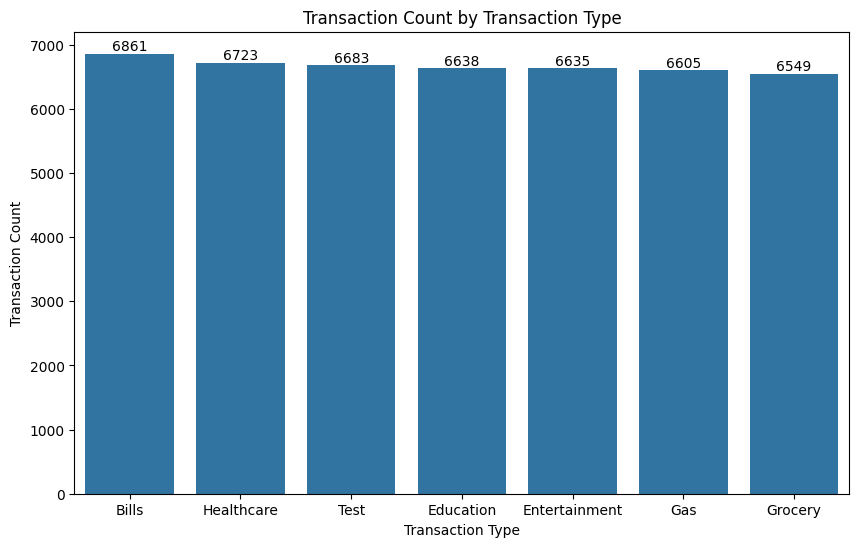

In [113]:
###3. Functional Requirements - Data Analysis and Visualization

#3.1 Calculate and plot which transaction type has the highest transaction count.

import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establish the connection to the database
def connect_to_db():
    return pymysql.connect(
        host='localhost',
        user='root',
        password='password',
        db='creditcard_capstone'
    )

# Fetch data from the database
def fetch_data(query):
    connection = connect_to_db()
    df = pd.read_sql(query, connection)
    connection.close()
    return df

query = """
SELECT TRANSACTION_TYPE, COUNT(TRANSACTION_TYPE) AS TRANSACTION_COUNT
FROM CDW_SAPP_CREDIT_CARD
GROUP BY TRANSACTION_TYPE
ORDER BY TRANSACTION_COUNT DESC;
"""

# Fetch data
transaction_type_df = fetch_data(query)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='TRANSACTION_TYPE', y='TRANSACTION_COUNT', data=transaction_type_df)
for i in ax.containers:
    ax.bar_label(i,)      #add value labels to the bars 
plt.title('Transaction Count by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.show()

C:\Users\SGKsk\AppData\Local\Temp\ipykernel_40888\335690232.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


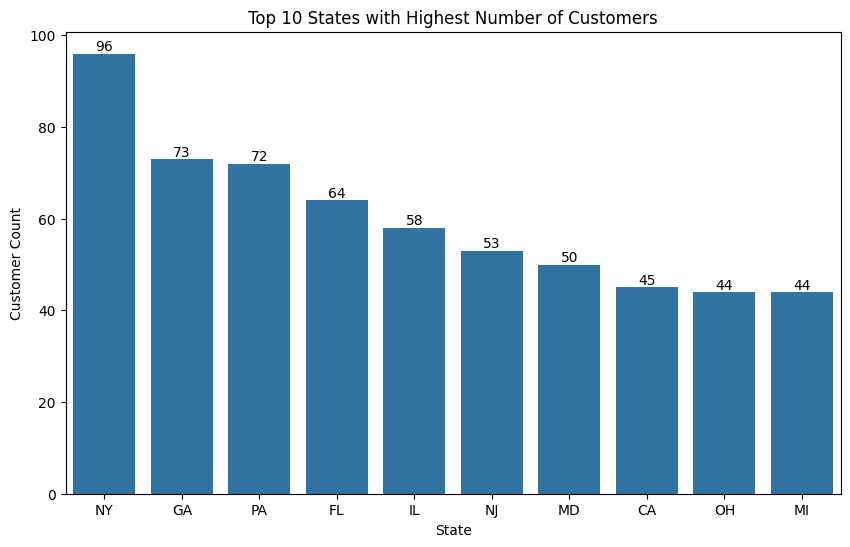

In [112]:
#3.2 Calculate and plot top 10 states with the highest number of customers

query = """
SELECT CUST_STATE, COUNT(CREDIT_CARD_NO) AS CUSTOMER_COUNT
FROM CDW_SAPP_CUSTOMER
GROUP BY CUST_STATE
ORDER BY CUSTOMER_COUNT DESC
LIMIT 10;
"""

# Fetch data
top_states_df = fetch_data(query)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='CUST_STATE', y='CUSTOMER_COUNT', data=top_states_df)
for i in ax.containers:
    ax.bar_label(i,)      #add value labels to the bars  
plt.title('Top 10 States with Highest Number of Customers')
plt.xlabel('State')
plt.ylabel('Customer Count')
plt.show()

C:\Users\SGKsk\AppData\Local\Temp\ipykernel_40888\335690232.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


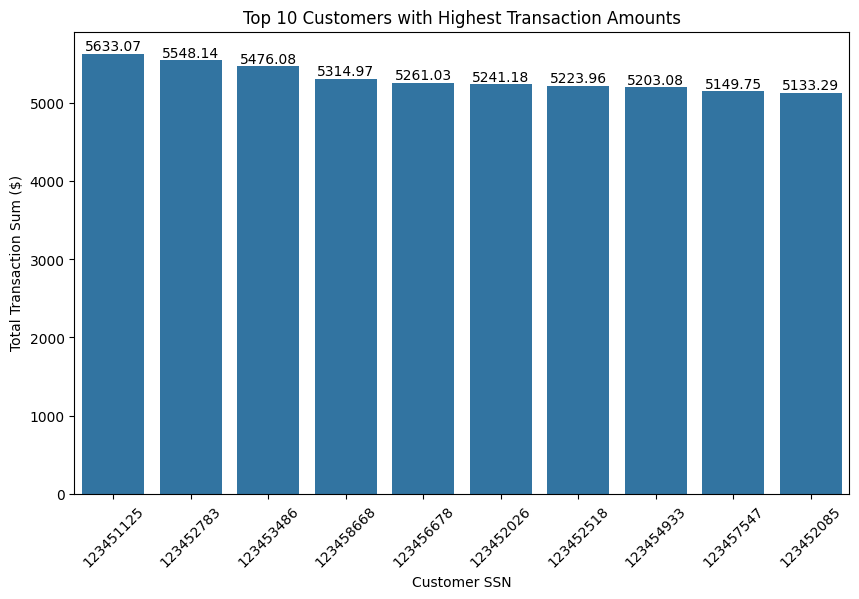

In [111]:
#3.3 
#Calculate the total transaction sum for each customer based on their individual transactions. 
#Identify the top 10 customers with the highest transaction amounts (in dollar value). 
#Create a plot to showcase these top customers and their transaction sums.

query = """
SELECT CUST_SSN, SUM(TRANSACTION_VALUE) AS TOTAL_TRANSACTION_SUM
FROM CDW_SAPP_CREDIT_CARD
GROUP BY CUST_SSN
ORDER BY TOTAL_TRANSACTION_SUM DESC
LIMIT 10;
"""

# Fetch data
top_customers_df = fetch_data(query)

#Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='CUST_SSN', y='TOTAL_TRANSACTION_SUM', data=top_customers_df, order=top_customers_df.sort_values(by='TOTAL_TRANSACTION_SUM', ascending=False)['CUST_SSN'])
for i in ax.containers:
    ax.bar_label(i,)      #add value labels to the bars  
plt.title('Top 10 Customers with Highest Transaction Amounts')
plt.xlabel('Customer SSN')
plt.ylabel('Total Transaction Sum ($)')
plt.xticks(rotation=45)
plt.show()

In [75]:
#4.1 Create a Python program to GET (consume) data from the above API endpoint for the loan application dataset.

import requests

# Define the API endpoint
api_url = "https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json"

# Send a GET request to the API endpoint
response = requests.get(api_url)


#4.2 Calculate the status code of the above API endpoint.

# Check the status code
status_code = response.status_code
print(f"Status Code: {status_code}")

# Check if the request was successful
if status_code == 200:
    loan_data = response.json()
    print("Data fetched successfully!")
else:
    print("Failed to fetch data from the API.")

Status Code: 200
Data fetched successfully!


In [79]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
#4.3 utilize PySpark to load data into RDBMS (SQL)
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql import types as T

# Initialize SparkSession
spark = SparkSession.builder.appName("LoanData").getOrCreate()

# Load loan data into a Pandas DataFrame (since response.json() returns a list of dicts)
loan_df = pd.DataFrame(loan_data)

schema = T.StructType([
    T.StructField("Application_ID", T.StringType(), True),
    T.StructField("Gender", T.StringType(), True),
    T.StructField("Married", T.StringType(), True),
    T.StructField("Dependents", T.StringType(), True),
    T.StructField("Education", T.StringType(), True),
    T.StructField("Self_Employed", T.StringType(), True),
    T.StructField("Credit_History", T.IntegerType(), True),
    T.StructField("Property_Area", T.StringType(), True),
    T.StructField("Income", T.StringType(), True),
    T.StructField("Application_Status", T.StringType(), True),
])

spark_loan_df = spark.createDataFrame(loan_df, schema=schema)

# Write data to MySQL
jdbc_url = "jdbc:mysql://localhost:3306/creditcard_capstone"
table_name = "CDW_SAPP_loan_application"
properties = {
    "user": "root",
    "password": "password",
    "driver": "com.mysql.cj.jdbc.Driver"
}

spark_loan_df.write.jdbc(url=jdbc_url, table=table_name, mode="overwrite", properties=properties)

# Stop SparkSession
spark.stop()

C:\Users\SGKsk\AppData\Local\Temp\ipykernel_40888\1574149517.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  loan_df = pd.read_sql(query, connection)


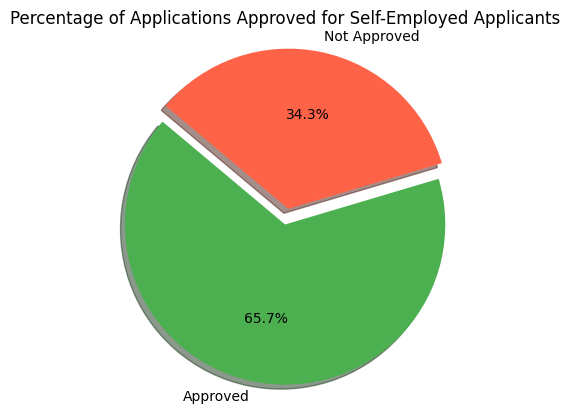

In [86]:
###5 Data Analysis and Visualization for LOAN Application

#5.1 Calculate and plot the percentage of applications approved for self-employed applicants. 
# Use the appropriate chart or graph to represent this data.

import pandas as pd
import pymysql
import matplotlib.pyplot as plt

# Establish the connection to the database
def connect_to_db():
    return pymysql.connect(
        host='localhost',
        user='root',
        password='password',
        db='creditcard_capstone'
    )

# Fetch data from the database
connection = connect_to_db()
query = "SELECT * FROM CDW_SAPP_loan_application"
loan_df = pd.read_sql(query, connection)

# Calculate percentage of approved applications for self-employed applicants
self_employed_total = loan_df[loan_df['Self_Employed'] == 'Yes'].shape[0]
self_employed_approved = loan_df[(loan_df['Self_Employed'] == 'Yes') & (loan_df['Application_Status'] == 'Y')].shape[0]
approval_percentage = (self_employed_approved / self_employed_total) * 100

# Plotting the data
labels = ['Approved', 'Not Approved']
sizes = [approval_percentage, 100 - approval_percentage]
#colors = ['#4CAF50', '#FF6347']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Applications Approved for Self-Employed Applicants')
plt.show()

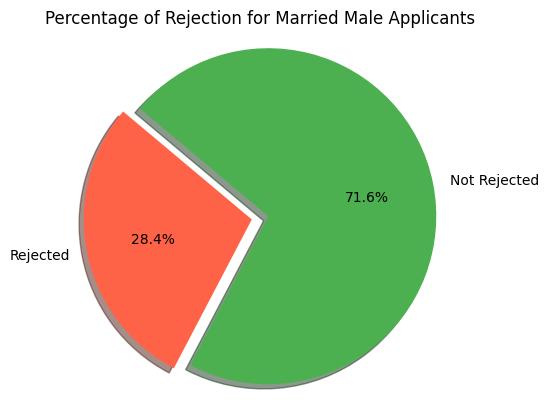

In [87]:
#5.2 
#Calculate the percentage of rejection for married male applicants. 
#Use the ideal chart or graph to represent this data.

# Calculate percentage of rejected applications for married male applicants
married_male_total = loan_df[(loan_df['Gender'] == 'Male') & (loan_df['Married'] == 'Yes')].shape[0]
married_male_rejected = loan_df[(loan_df['Gender'] == 'Male') & (loan_df['Married'] == 'Yes') & (loan_df['Application_Status'] == 'N')].shape[0]
rejection_percentage = (married_male_rejected / married_male_total) * 100

# Plotting the data
labels = ['Rejected', 'Not Rejected']
sizes = [rejection_percentage, 100 - rejection_percentage]
colors = ['#FF6347', '#4CAF50']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Rejection for Married Male Applicants')
plt.show()

In [104]:
pip install datetime

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/44.1 kB ? eta -:--:--
     ---------------------------------------- 44.1/44.1 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
   ---------------------------------------- 52.6/52.6 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/206.4 kB ? eta -:--:--
   --------------------------------------- 206.4/206.4 kB 12.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\SGKsk\AppData\Local\Temp\ipykernel_40888\620977839.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  credit_card_df = pd.read_sql(query, connection)
C:\Users\SGKsk\AppData\Local\Temp\ipykernel_40888\620977839.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='YEAR_MONTH', y='TRANSACTION_COUNT', data=top_three_months, palette='viridis')


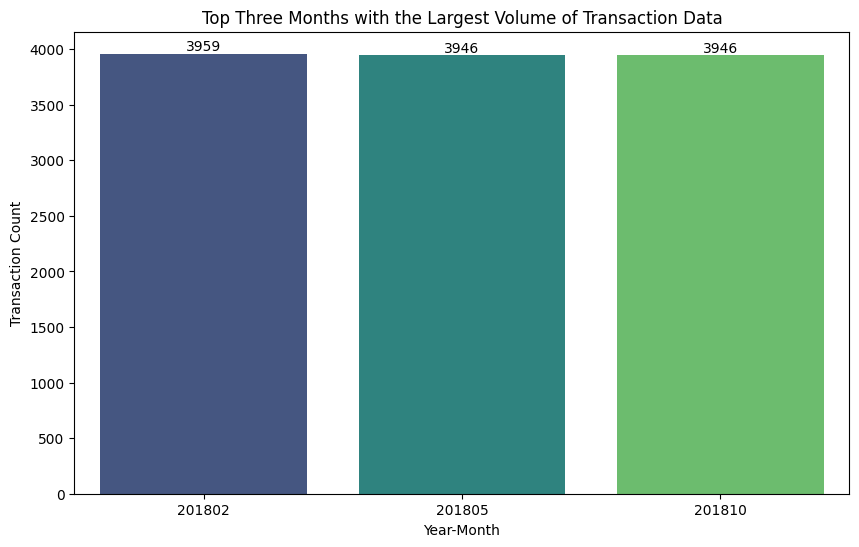

In [106]:
#5.3 
#Calculate and plot the top three months with the largest volume of transaction data. 
#Use the ideal chart or graph to represent this data.

#Fetch data from database
query = "SELECT * FROM CDW_SAPP_CREDIT_CARD"
credit_card_df = pd.read_sql(query, connection)

#Extract year and month
credit_card_df['YEAR_MONTH'] = credit_card_df['TIMEID'].astype(str).str[:6]
# for i in credit_card_df['YEAR_MONTH']:
#     datetime.datetime.strptime(i,'%Y%m').date().isoformat()
monthly_transaction_volume = credit_card_df.groupby('YEAR_MONTH').size().reset_index(name='TRANSACTION_COUNT')

# for i in monthly_transaction_volume['YEAR_MONTH']:
#     i = i[0:4] + "-" + i[4:6]
# print(monthly_transaction_volume['YEAR_MONTH'])


# Get top three months
top_three_months = monthly_transaction_volume.nlargest(3, 'TRANSACTION_COUNT')

# Plotting the data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='YEAR_MONTH', y='TRANSACTION_COUNT', data=top_three_months, palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)      #add value labels to the bars  
plt.title('Top Three Months with the Largest Volume of Transaction Data')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.show()

C:\Users\SGKsk\AppData\Local\Temp\ipykernel_40888\2384928575.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='BRANCH_CODE', y='TRANSACTION_VALUE', data=top_branch, palette='viridis', order=top_branch.sort_values(by='TRANSACTION_VALUE', ascending=False)['BRANCH_CODE'])


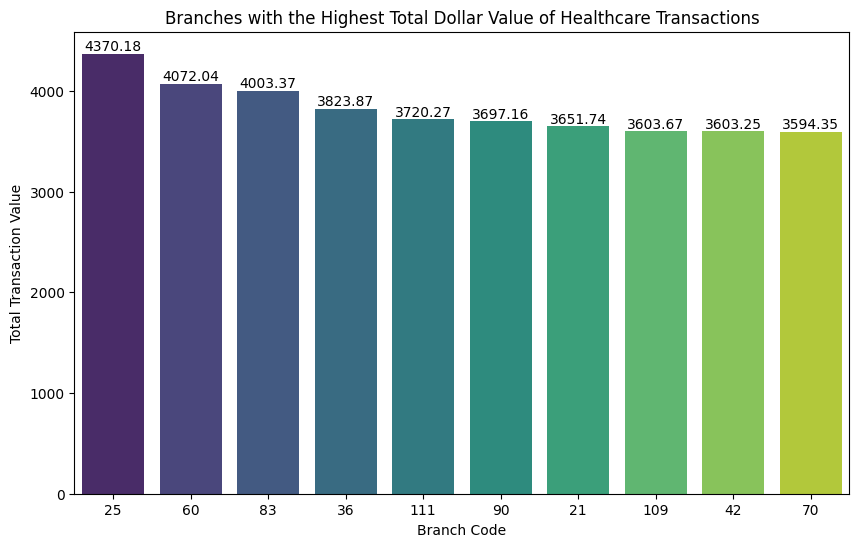

In [114]:
#5.4 
#Calculate and plot which branch processed the highest total dollar value of healthcare transactions. 
#Use the ideal chart or graph to represent this data.

#Filter healthcare transactions
healthcare_transactions = credit_card_df[credit_card_df['TRANSACTION_TYPE'] == 'Healthcare']

# Group by branch and calculate total dollar value
branch_total_value = healthcare_transactions.groupby('BRANCH_CODE')['TRANSACTION_VALUE'].sum().reset_index()

# Get the branch with the highest total dollar value
top_branch = branch_total_value.nlargest(10, 'TRANSACTION_VALUE')

# Plotting the data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='BRANCH_CODE', y='TRANSACTION_VALUE', data=top_branch, palette='viridis', order=top_branch.sort_values(by='TRANSACTION_VALUE', ascending=False)['BRANCH_CODE'])
for i in ax.containers:
    ax.bar_label(i,)      #add value labels to the bars  
plt.title('Branches with the Highest Total Dollar Value of Healthcare Transactions')
plt.xlabel('Branch Code')
plt.ylabel('Total Transaction Value')
plt.show()

In [45]:
#2.1 Transaction Details Module

# user_zipcode = input("Enter your zip code. Make sure it is 5 digits.")
# user_mo_yr = input("What month and year is it? Enter in format 01/2024 for January 2024")
# user_

import re
#import pyodbc
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.sql.functions import col, desc

# Initialize Spark session
spark = SparkSession.builder.appName("Transactions").getOrCreate()

def is_valid_zip(zip_code):
    return re.match(r'^\d{5}(?:[-\s]\d{4})?$', zip_code) is not None

def is_valid_month_year(month, year):
    return re.match(r'^(0[1-9]|1[0-2])$', month) is not None and re.match(r'^\d{4}$', year) is not None

def get_user_input():
    while True:
        zip_code = input("Enter a valid zip code (e.g., 12345 or 12345-6789): ")
        if is_valid_zip(zip_code):
            break
        else:
            print("Invalid zip code. Please try again.")
    
    while True:
        month = input("Enter a valid month (MM): ")
        year = input("Enter a valid year (YYYY): ")
        if is_valid_month_year(month, year):
            break
        else:
            print("Invalid month or year. Please try again.")
    
    return zip_code, month, year

def query_transactions(zip_code, month, year):
    conn = pyodbc.connect(
        'DRIVER={ODBC Driver 17 for SQL Server};'
        'SERVER=your_server_name;'
        'DATABASE=creditcard_capstone;'
        'UID=root;'
        'PWD=password'
    )
    
    query = f"""
    SELECT transaction_id, zip_code, transaction_date, amount
    FROM transactions
    WHERE zip_code = '{zip_code}' AND 
          YEAR(transaction_date) = {year} AND 
          MONTH(transaction_date) = {month}
    """
    
    df = spark.read.format("jdbc").option("url", "jdbc:sqlserver://your_server_name;databaseName=creditcard_capstone")\
        .option("dbtable", f"({query}) as transactions").option("user", "root")\
        .option("password", "password").option("driver", "com.microsoft.sqlserver.jdbc.SQLServerDriver").load()
    
    # Sort by transaction_date in descending order
    sorted_transactions = df.orderBy(desc("transaction_date"))
    
    return sorted_transactions

def display_transactions(transactions):
    if transactions.count() == 0:
        print("No transactions found for given zip code and date")
    else:
        transactions.show()

def main():
    zip_code, month, year = get_user_input()
    transactions = query_transactions(zip_code, month, year)
    display_transactions(transactions)

if __name__ == "__main__":
    main()



ModuleNotFoundError: No module named 'pyodbc'

In [39]:
import re
import pyodbc
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc

# Initialize Spark session
spark = SparkSession.builder.appName("ZipCodeTransactions").getOrCreate()

def is_valid_zip(zip_code):
    return re.match(r'^\d{5}(?:[-\s]\d{4})?$', zip_code) is not None

def is_valid_month_year(month, year):
    return re.match(r'^(0[1-9]|1[0-2])$', month) is not None and re.match(r'^\d{4}$', year) is not None

def get_user_input():
    while True:
        zip_code = input("Enter a valid zip code (e.g., 12345 or 12345-6789): ")
        if is_valid_zip(zip_code):
            break
        else:
            print("Invalid zip code. Please try again.")
    
    while True:
        month = input("Enter a valid month (MM): ")
        year = input("Enter a valid year (YYYY): ")
        if is_valid_month_year(month, year):
            break
        else:
            print("Invalid month or year. Please try again.")
    
    return zip_code, month, year

def query_transactions(zip_code, month, year):
    conn = pyodbc.connect(
        'DRIVER={ODBC Driver 17 for SQL Server};'
        'SERVER=your_server_name;'
        'DATABASE=creditcard_capstone;'
        'UID=root;'
        'PWD=password'
    )

    query = f"""
    SELECT cc.transaction_id, cc.zip_code, cc.transaction_date, cc.amount
    FROM CDW_SAPP_CREDIT_CARD cc
    INNER JOIN CDW_SAPP_CUSTOMER cust ON cc.cust_id = cust.cust_id
    WHERE cust.cust_zip = '{zip_code}' AND 
          YEAR(cc.transaction_date) = {year} AND 
          MONTH(cc.transaction_date) = {month}
    """
    
    df = spark.read.format("jdbc").option("url", "jdbc:sqlserver://your_server_name;databaseName=creditcard_capstone")\
        .option("dbtable", f"({query}) as transactions").option("user", "your_username")\
        .option("password", "your_password").option("driver", "com.microsoft.sqlserver.jdbc.SQLServerDriver").load()
    
    # Sort by transaction_date in descending order
    sorted_transactions = df.orderBy(desc("transaction_date"))
    
    return sorted_transactions

def display_transactions(transactions):
    if transactions.count() == 0:
        print("No transactions found for the given zip code and date.")
    else:
        transactions.show()

def main():
    zip_code, month, year = get_user_input()
    transactions = query_transactions(zip_code, month, year)
    display_transactions(transactions)

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'pyodbc'

In [43]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("TransactionAnalysis").getOrCreate()

# Load data
transactions = spark.read.csv("path_to_transaction_data.csv", header=True, inferSchema=True)

# Group by transaction type and count the occurrences
transaction_type_counts = transactions.groupBy("transaction_type").count()

# Convert to Pandas for visualization
transaction_type_counts_pd = transaction_type_counts.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(transaction_type_counts_pd['transaction_type'], transaction_type_counts_pd['count'])
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("transaction_count_by_type.png")
plt.show()

AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/c:/Users/SGKsk/Development - Per Scholas/2024-RTT-107-Sharon/Module 345/path_to_transaction_data.csv.

In [ ]:
# Load customer data
customers = spark.read.csv("path_to_customer_data.csv", header=True, inferSchema=True)

# Group by state and count the number of customers
state_customer_counts = customers.groupBy("state").count().orderBy("count", ascending=False).limit(10)

# Convert to Pandas for visualization
state_customer_counts_pd = state_customer_counts.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(state_customer_counts_pd['state'], state_customer_counts_pd['count'])
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Top 10 States with the Highest Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_10_states_by_customers.png")
plt.show()

In [ ]:
# Calculate the total transaction sum for each customer
customer_transaction_sums = transactions.groupBy("CUST_SSN").sum("transaction_amount").alias("total_transaction_sum")

# Order by total transaction sum and get the top 10 customers
top_customers = customer_transaction_sums.orderBy("sum(transaction_amount)", ascending=False).limit(10)

# Convert to Pandas for visualization
top_customers_pd = top_customers.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_customers_pd['CUST_SSN'], top_customers_pd['sum(transaction_amount)'])
plt.xlabel('Customer SSN')
plt.ylabel('Total Transaction Amount')
plt.title('Top 10 Customers by Transaction Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_10_customers_by_transaction_amount.png")
plt.show()

In [70]:
#4 Access to Loan API Endpoint
import requests

response = requests.get("https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json")

print(response)

TypeError: Session.request() got an unexpected keyword argument 'port'

In [ ]:
#CHECKS & make sure all code is within functions

In [ ]:
###3. Functional Requirements - Data Analysis and Visualization

import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#establish connection to database
def connect_to_db():
    return pymysql.connect(
        host='localhost',
        user='root',
        password='password',
        db='creditcard_capstone'
    )

#3.1 Calculate and plot which transaction type has the highest transaction count.
def calculate_plot_highest_transaction_count():
    query = """
    SELECT TRANSACTION_TYPE, COUNT(TRANSACTION_TYPE) AS TRANSACTION_COUNT
    FROM CDW_SAPP_CREDIT_CARD
    GROUP BY TRANSACTION_TYPE
    ORDER BY TRANSACTION_COUNT DESC;
    """
    connection = connect_to_db()
    transaction_type_df = pd.read_sql(query, connection)
    connection.close()

    #Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='TRANSACTION_TYPE', y='TRANSACTION_COUNT', data=transaction_type_df)
    for i in ax.containers:
        ax.bar_label(i,)      #add value labels to the bars 
    plt.title('Transaction Count by Transaction Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Transaction Count')
    plt.show()


#3.2 Calculate and plot top 10 states with the highest number of customers
def calculate_plot_top_10_states_most_customers():
    query = """
    SELECT CUST_STATE, COUNT(CREDIT_CARD_NO) AS CUSTOMER_COUNT
    FROM CDW_SAPP_CUSTOMER
    GROUP BY CUST_STATE
    ORDER BY CUSTOMER_COUNT DESC
    LIMIT 10;
    """
    connection = connect_to_db()
    top_states_df = pd.read_sql(query, connection)
    connection.close()

    #Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='CUST_STATE', y='CUSTOMER_COUNT', data=top_states_df)
    for i in ax.containers:
        ax.bar_label(i,)      #add value labels to the bars 
    plt.title('Top 10 States with Highest Number of Customers')
    plt.xlabel('State')
    plt.ylabel('Customer Count')
    plt.show()


#3.3 
#Calculate the total transaction sum for each customer based on their individual transactions. 
#Identify the top 10 customers with the highest transaction amounts (in dollar value). 
#Create a plot to showcase these top customers and their transaction sums.

def calculate_plot_top_10_customer_total_transaction_sums():
    query = """
    SELECT CUST_SSN, SUM(TRANSACTION_VALUE) AS TOTAL_TRANSACTION_SUM
    FROM CDW_SAPP_CREDIT_CARD
    GROUP BY CUST_SSN
    ORDER BY TOTAL_TRANSACTION_SUM DESC
    LIMIT 10;
    """

    connection = connect_to_db()
    top_customers_df = pd.read_sql(query, connection)
    connection.close()

    #Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='CUST_SSN', y='TOTAL_TRANSACTION_SUM', data=top_customers_df, order=top_customers_df.sort_values(by='TOTAL_TRANSACTION_SUM', ascending=False)['CUST_SSN'])
    for i in ax.containers:
        ax.bar_label(i,)      #add value labels to the bars  
    plt.title('Top 10 Customers with Highest Transaction Amounts')
    plt.xlabel('Customer SSN')
    plt.ylabel('Total Transaction Sum ($)')
    plt.xticks(rotation=45)
    plt.show()


if __name__ == "__main__":
    #calculate_plot_highest_transaction_count()
    #calculate_plot_top_10_states_most_customers()
    calculate_plot_top_10_customer_total_transaction_sums()

C:\Users\SGKsk\AppData\Local\Temp\ipykernel_31644\4246574328.py:103: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  credit_card_df = pd.read_sql(query, connection)
C:\Users\SGKsk\AppData\Local\Temp\ipykernel_31644\4246574328.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='BRANCH_CODE', y='TRANSACTION_VALUE', data=top_branch, palette='viridis', order=top_branch.sort_values(by='TRANSACTION_VALUE', ascending=False)['BRANCH_CODE'])


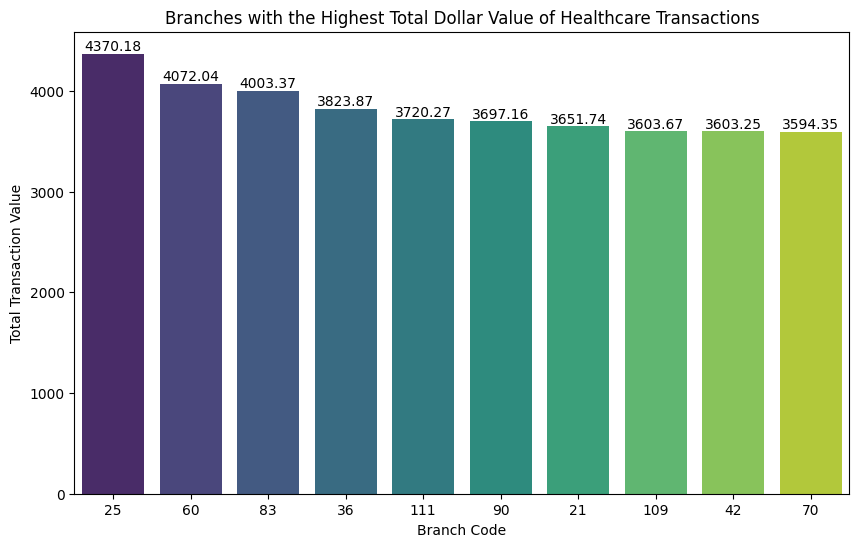

In [14]:
###5 Data Analysis and Visualization for LOAN Application

import pandas as pd
import pymysql
import matplotlib.pyplot as plt

def connect_to_db():
    return pymysql.connect(
        host='localhost',
        user='root',
        password='password',
        db='creditcard_capstone'
    )

#5.1 Calculate and plot the percentage of applications approved for self-employed applicants. 
# Use the appropriate chart or graph to represent this data.

def calculate_plot_percentage_approved_self_employed():
    connection = connect_to_db()
    query = "SELECT * FROM CDW_SAPP_loan_application"
    loan_df = pd.read_sql(query, connection)
    connection.close()

    #Calculate % of approved applications for self-employed applicants
    self_employed_total = loan_df[loan_df['Self_Employed'] == 'Yes'].shape[0]
    self_employed_approved = loan_df[(loan_df['Self_Employed'] == 'Yes') & (loan_df['Application_Status'] == 'Y')].shape[0]
    approval_percentage = (self_employed_approved / self_employed_total) * 100

    #Plot
    labels = ['Approved', 'Not Approved']
    sizes = [approval_percentage, 100 - approval_percentage]
    colors = ['#4CAF50', '#FF6347']
    explode = (0.1, 0)  # explode 1st slice

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Percentage of Applications Approved for Self-Employed Applicants')
    plt.show()


#5.2 
#Calculate the percentage of rejection for married male applicants. 
#Use the ideal chart or graph to represent this data.

def calculate_plot_percentage_rejected_married_male():
    connection = connect_to_db()
    query = "SELECT * FROM CDW_SAPP_loan_application"
    loan_df = pd.read_sql(query, connection)
    connection.close()

    #Calculate % rejected applications for married male applicants
    married_male_total = loan_df[(loan_df['Gender'] == 'Male') & (loan_df['Married'] == 'Yes')].shape[0]
    married_male_rejected = loan_df[(loan_df['Gender'] == 'Male') & (loan_df['Married'] == 'Yes') & (loan_df['Application_Status'] == 'N')].shape[0]
    rejection_percentage = (married_male_rejected / married_male_total) * 100

    #Plot
    labels = ['Rejected', 'Not Rejected']
    sizes = [rejection_percentage, 100 - rejection_percentage]
    colors = ['#FF6347', '#4CAF50']
    explode = (0.1, 0)  # explode 1st slice

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Percentage of Rejection for Married Male Applicants')
    plt.show()


#5.3 
#Calculate and plot the top three months with the largest volume of transaction data. 
#Use the ideal chart or graph to represent this data.

def calculate_plot_top_3_months_most_transaction_data():
    connection = connect_to_db()
    query = "SELECT * FROM CDW_SAPP_CREDIT_CARD"
    credit_card_df = pd.read_sql(query, connection)
    connection.close()

    #Extract year and month
    credit_card_df['YEAR_MONTH'] = credit_card_df['TIMEID'].astype(str).str[:6]
    monthly_transaction_volume = credit_card_df.groupby('YEAR_MONTH').size().reset_index(name='TRANSACTION_COUNT')

    #Get top 3 months
    top_three_months = monthly_transaction_volume.nlargest(3, 'TRANSACTION_COUNT')

    #Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='YEAR_MONTH', y='TRANSACTION_COUNT', data=top_three_months, palette='viridis')
    for i in ax.containers:
        ax.bar_label(i,)      #add value labels to the bars  
    plt.title('Top Three Months with the Largest Volume of Transaction Data')
    plt.xlabel('Year-Month')
    plt.ylabel('Transaction Count')
    plt.show()


#5.4 
#Calculate and plot which branch processed the highest total dollar value of healthcare transactions. 
#Use the ideal chart or graph to represent this data.

def calculate_plot_branch_highest_value_healthcare_transactions():
    connection = connect_to_db()
    query = "SELECT * FROM CDW_SAPP_CREDIT_CARD"
    credit_card_df = pd.read_sql(query, connection)
    connection.close()

    #filter healthcare transactions
    healthcare_transactions = credit_card_df[credit_card_df['TRANSACTION_TYPE'] == 'Healthcare']

    #group by branch and calculate total $ value
    branch_total_value = healthcare_transactions.groupby('BRANCH_CODE')['TRANSACTION_VALUE'].sum().reset_index()

    #get branch with highest total $ value
    top_branch = branch_total_value.nlargest(10, 'TRANSACTION_VALUE')

    #plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='BRANCH_CODE', y='TRANSACTION_VALUE', data=top_branch, palette='viridis', order=top_branch.sort_values(by='TRANSACTION_VALUE', ascending=False)['BRANCH_CODE'])
    for i in ax.containers:
        ax.bar_label(i,)      #add value labels to the bars  
    plt.title('Branches with the Highest Total Dollar Value of Healthcare Transactions')
    plt.xlabel('Branch Code')
    plt.ylabel('Total Transaction Value')
    plt.show()


    
if __name__ == "__main__":
    #calculate_plot_percentage_approved_self_employed()
    #calculate_plot_percentage_rejected_married_male()
    #calculate_plot_top_3_months_most_transaction_data()
    calculate_plot_branch_highest_value_healthcare_transactions()

In [7]:
###4 LOAN Application Dataset

def get_loan_application_data():

    #4.1 Create a Python program to GET (consume) data from the above API endpoint for the loan application dataset.
    
    import requests
    #API endpoint
    api_url = "https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json"

    #Send GET request to API endpoint
    response = requests.get(api_url)


    #4.2 Calculate the status code of the above API endpoint.

    #Check status code
    status_code = response.status_code
    print(f"Status Code: {status_code}")

    #Check if request was successful
    if status_code == 200:
        loan_data = response.json()
        print("Data fetched successfully!")
    else:
        print("Failed to fetch data from the API.")


    #4.3 Load data into RDBMS (SQL) w/ PySpark
    from pyspark.sql import SparkSession
    import pandas as pd
    from pyspark.sql import types as T

    spark = SparkSession.builder.appName("LoanData").getOrCreate()

    #Load loan data into a Pandas DataFrame
    loan_df = pd.DataFrame(loan_data)

    schema = T.StructType([
        T.StructField("Application_ID", T.StringType(), True),
        T.StructField("Gender", T.StringType(), True),
        T.StructField("Married", T.StringType(), True),
        T.StructField("Dependents", T.StringType(), True),
        T.StructField("Education", T.StringType(), True),
        T.StructField("Self_Employed", T.StringType(), True),
        T.StructField("Credit_History", T.IntegerType(), True),
        T.StructField("Property_Area", T.StringType(), True),
        T.StructField("Income", T.StringType(), True),
        T.StructField("Application_Status", T.StringType(), True),
    ])

    spark_loan_df = spark.createDataFrame(loan_df, schema=schema)

    #data -> MySQL
    jdbc_url = "jdbc:mysql://localhost:3306/creditcard_capstone"
    table_name = "CDW_SAPP_loan_application"
    properties = {
        "user": "root",
        "password": "password",
        "driver": "com.mysql.cj.jdbc.Driver"
    }

    spark_loan_df.write.jdbc(url=jdbc_url, table=table_name, mode="overwrite", properties=properties)

    spark.stop()

# if __name__ == "__main__":
#     get_loan_application_data()

Status Code: 200
Data fetched successfully!


KeyboardInterrupt: 

In [1]:

import os
import dotenv
from dotenv import load_dotenv
load_dotenv()
OTHER_USER = os.getenv("OTHER_USER")
OTHER_PASSWORD = os.getenv("OTHER_PASSWORD")
DB_HOST = 'localhost'
DB_NAME = 'classicmodels'

print(f"DB_USER: {OTHER_USER}")
print(f"DB_PASSWORD: {OTHER_PASSWORD}")
print(f"DB_HOST: {DB_HOST}")
print(f"DB_NAME: {DB_NAME}")

DB_USER: None
DB_PASSWORD: None
DB_HOST: localhost
DB_NAME: classicmodels


In [2]:
import os
from dotenv import load_dotenv
import pymysql

# Load environment variables from .env file
load_dotenv()

# Get credentials from environment variables
DB_USER = os.getenv("OTHER_USER")
DB_PASSWORD = os.getenv("OTHER_PASSWORD")
DB_HOST = 'localhost'
DB_NAME = 'classicmodels'

# Establish database connection
connection = pymysql.connect(
    host=DB_HOST,
    user=DB_USER,
    password=DB_PASSWORD,
    database=DB_NAME
)

# Test connection
try:
    with connection.cursor() as cursor:
        cursor.execute("SELECT VERSION()")
        result = cursor.fetchone()
        print(f"Database version: {result}")
finally:
    connection.close()

OperationalError: (1045, "Access denied for user 'SGKsk'@'localhost' (using password: NO)")

In [8]:
def username():
    user='root'
    return user
    # password='password'


def password():
    password='password'
    return password

def connect_to_db():
    #Connect to MySQL database
    connection = pymysql.connect(
        host="localhost",
        # user="root",
        # password="password",
        user=username(),
        password=password(),
        db="creditcard_capstone"
    )
    print("Connected")
    # print(user)
    # print(password)
    return connection

connect_to_db()

Connected
